<h1> House prices prediciton </h1>

In this project, I'm going to analyze the data, clean the data and create e regression model to try to predict the house prices based on the several parameters given.

In [1]:
#import necessary libraries for data analysis, data visualization ad machine learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
correlation_factor = 0.1

In [3]:
#import the training data
df = pd.read_csv('train.csv')

df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#check some features about the data
print('Information about the data:\n')
print(df.info())

Information about the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

We can see by the second to last row that most of the columns are categorical variables. If we are going to use categorical values, we will then need to create dummy variables to turn each categorical value into binary values. From this, we can also check taht there are a lot of variables that have missing data, specially PoolQC and MiscFeature. 

In [5]:
print('Missing values:\n')
#isna: turns each value of a df into True or False based on if it is nan or not
#df.sum() : for every column, it sums every value, creating a series where the index are the column names and the values are 
# the sum of the column

Values = df.isna().sum()

#count(): counts the number of instances that are non null, returning a series where the index is the column name and the values
#are the number of non-nan values.
#Here what we want is the number of rows. If we did df.count(), we would return a value lower than the number of rows,
#since there are null values in the columns. So we tranform the values of the df into True or False, which neither are null.
#Could also just do len(df).

percentage = df.isna().sum()/df.isna().count()*100

# Joins both series into a df, and the column names are ['Values', 'Percent'].
percentage_df = pd.concat([Values, percentage], axis=1, keys=['Values', 'Percent'])

#sort_values(): Sorts the values by the column 'Values'
print(percentage_df.sort_values(by = 'Values', ascending = False).head(20))

Missing values:

              Values    Percent
PoolQC          1453  99.520548
MiscFeature     1406  96.301370
Alley           1369  93.767123
Fence           1179  80.753425
FireplaceQu      690  47.260274
LotFrontage      259  17.739726
GarageYrBlt       81   5.547945
GarageCond        81   5.547945
GarageType        81   5.547945
GarageFinish      81   5.547945
GarageQual        81   5.547945
BsmtFinType2      38   2.602740
BsmtExposure      38   2.602740
BsmtQual          37   2.534247
BsmtCond          37   2.534247
BsmtFinType1      37   2.534247
MasVnrArea         8   0.547945
MasVnrType         8   0.547945
Electrical         1   0.068493
Id                 0   0.000000


As observed above, there are some variables that have a lot of missing information such as PoolQC, MiscFeature, Alley, Fence. Most probably, we are going to remove these variables since most data doesn't have this values.

After reading the information on each column meaning, before doing any 'general analysis, I'm going to check if some of the variables that I think should be important to determine the house price. These are:

**GrLivArea**: The bigger the living area, the more expensive the house. There are some area metrics, but this one I feel is the most important. The other areas, like lot area or garage area, should also be heavily correlated with this one.

**Utilities**: If a house doesn´t have all the utilities, the price should be lower. Although most houses should have all the utilities.

**Neighborhood**: Although most neighborhoods should be the same, there will probably be some exceptions, some realy bad and others really good. Instead of making a dumy variable for each neighborhood we will probably just group them in 'bad', 'average' and 'good'.

**OverallQual**: This should be heavilly correlated with overallcond. The higher the quality, the better.

**BedroomAbvGr**: Maybe after some bedrooms the price won´t increase, but in general, the more bedrooms, the better.

Some variables that are less probable to influence the price, but still might:

**KitchenQual**

**GarageArea**

**SaleType**

Now let's check if the Sales price is normaly distributed. If it isn´t, we will transform the sales price into the log(SalePrice).

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

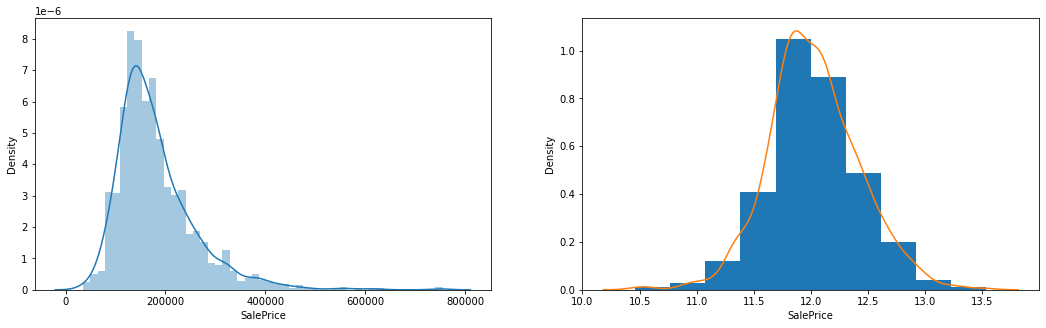

In [6]:
# Creates a figure and a set of subplots. Inthis case, figure as a width of 18 and a heigh of 5. 
# It will create two plots, two for each row (only 1 row). Returns a figure and a set of axes (2)
plt.subplots(1,2,figsize = (18,5))
# Add an Axes to the current figure, in the position with index 1
plt.subplot(1,2,1)
#combines the histplot from matplotlib with the kdeplot from seaborn
sns.distplot(df.SalePrice)
plt.subplot(1,2,2)
#Same thing as the above but separate. Density = True since the sns.kdeplot uses probability density and not counts.
plt.hist(np.log(df.SalePrice), density = True)
sns.kdeplot(np.log(df.SalePrice))

In [7]:
df.SalePrice = np.log(df.SalePrice)

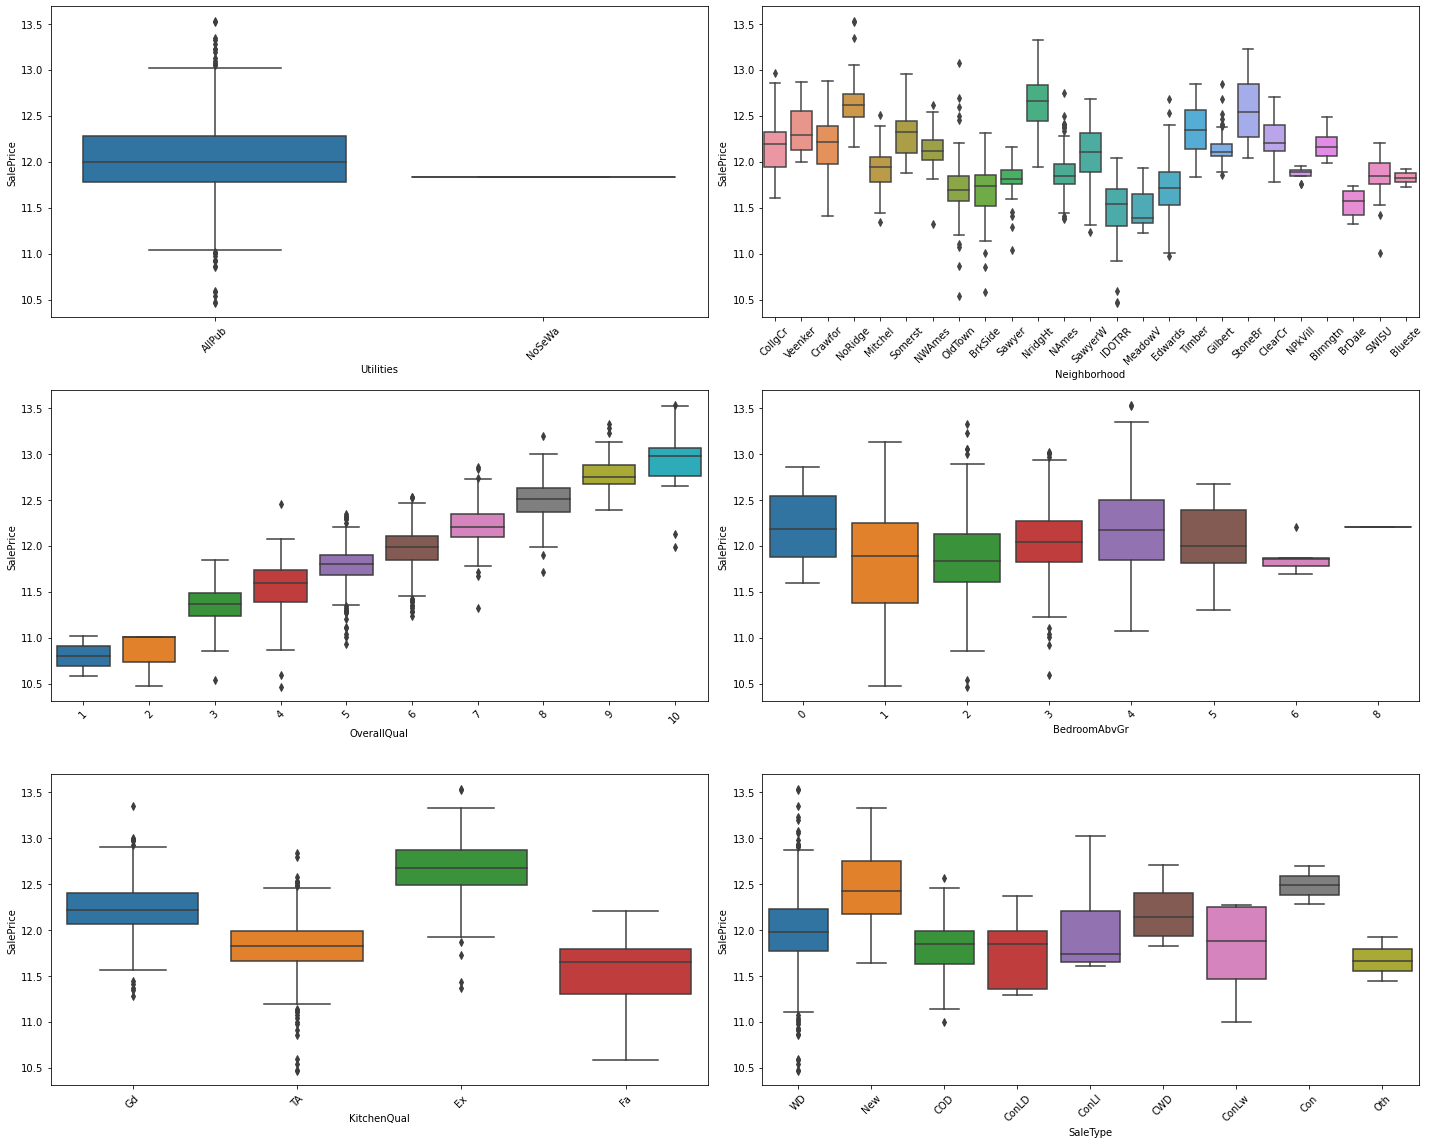

In [8]:
suspect_columns_cat = [ 'Utilities', 'Neighborhood', 'OverallQual', 'BedroomAbvGr', 'KitchenQual', 'SaleType']
suspect_columns_num = ['GrLivArea', 'GarageArea']
#Creates a figure with size 20,16 and six subplots, two per row
fig, ax = plt.subplots(3,2, figsize = (20,16))
#goes to every categorical column in the list above and creates a boxplot relating it with SalePrice
for i in range(len(suspect_columns_cat)):
    #Populates the subplot i+1
    plt.subplot(3,2,i+1)
    sns.boxplot(x = suspect_columns_cat[i], y = 'SalePrice', data = df)
    plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

From the first graph we can see that most places have all the utilities, so adding the utilities to the ML should not add anything. In the neighborhood case, it does seem indeed that there are diferences between some of them. Overall quality also increases house prices and the number of bedrooms doesn´t really seem to have an impact in sales prices. In terms of kitchen quality and sale types, it does seem that they also affect the sales prices. 

To better take a look at which neighborhood affects the most, and if we can indeed separate them in groups, next I will make a boxplot ordered by median.

In [9]:
#Creates a dataframe with only the neighborhood and the sales price
def get_ordered_boxplot(column: str, size: tuple, df_1: pd.core.frame.DataFrame = df, figure = True) -> 'ax':
    boxplot_df = df_1[[column, 'SalePrice']]
    #Groups the df with neigborhood, creating a DataFrameGroupBy, with, basically, the 'column' values as the series and 
    #in the SalePrice, a series with values with size of len(df) containing the sale index and SalePrice if the column as, for example, the 
    #neighborhood Blmngtn. If it wasn't Blmngtn, the value is Nan.
    boxplot_df_grouped = boxplot_df.groupby(column, axis = 0)
    #Created a dictionary with the 'column' as keys and the values are the series of SalePrice mentioned above. And creates a df
    #based on that dictionary
    df2 = pd.DataFrame({col:vals['SalePrice'] for col,vals in boxplot_df_grouped})
    #Creates a series where the index are the column values and the values are the median of SalePrice.
    meds = df2.median()
    #Orders with the median values
    meds.sort_values(ascending=True, inplace=True)
    #Changes the orther of the columns df2 to be the sorted index of the series meds
    df2 = df2[meds.index]
    #In case I want to create multiple ordered boxplots, I want to have one figure with all the plots and not a figure for each
    #plot.
    if figure:
        plt.figure(figsize = size)
    ax = df2.boxplot()
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    return ax, meds.index



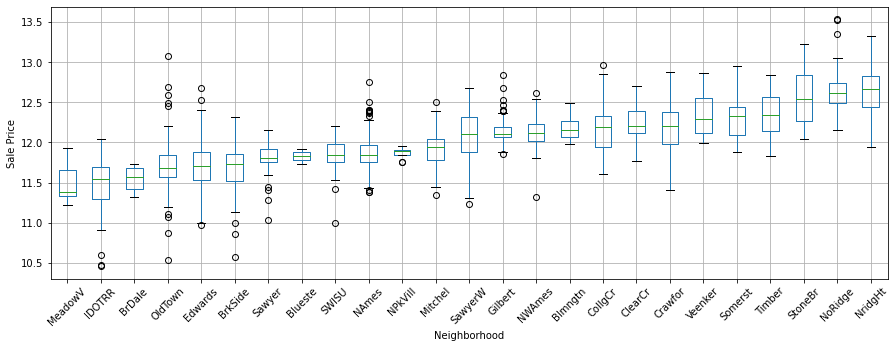

In [10]:
neighborhood_boxplot = get_ordered_boxplot('Neighborhood',(15,5))

plt.show()


We can see even more clearly that the neighborhodd does indeed have an impact in the sales price, starting from a median below 100000 (MeadowV) to a median above 30000 (NridgHt). Next, I'm going to separate the neighborhoods into 3 different groups, based on the median.

In [11]:
low = ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel']
median = ['SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Veenker', 'Somerst', 'Timber']
high = ['StoneBr', 'NoRidge', 'NridgHt']
def neighborhood(x, low, median, high):
    if x in low:
        x = 0
    elif x in median:
        x = 1
    else:
        x = 2
    return x

In [12]:
#Going to give each house a neghboord value of 0, 1 or 2 based on the lists created above
df['Neighborhood_score'] = df['Neighborhood'].apply(neighborhood, args = (low, median, high))

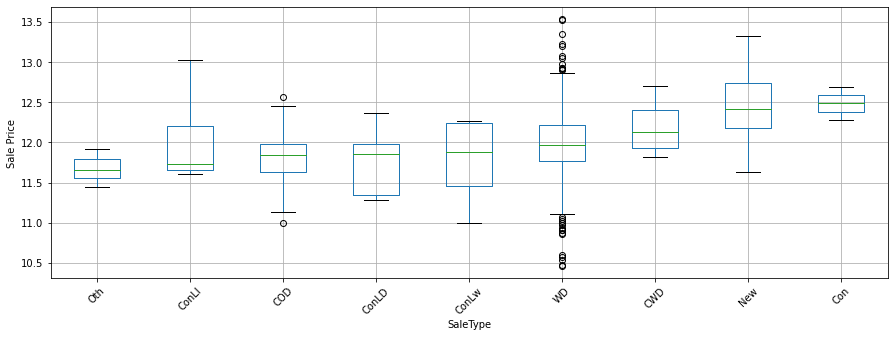

In [13]:
#Doing the same thing but with sales types
neighborhood_boxplot = get_ordered_boxplot('SaleType', (15,5))
plt.show()

Here it's more clear that sale type also influences the sale price, although not to such a degree as the neighborhood.

Now that we looked at this initial categorical variables, we can take a look at the two initial continuous variables.

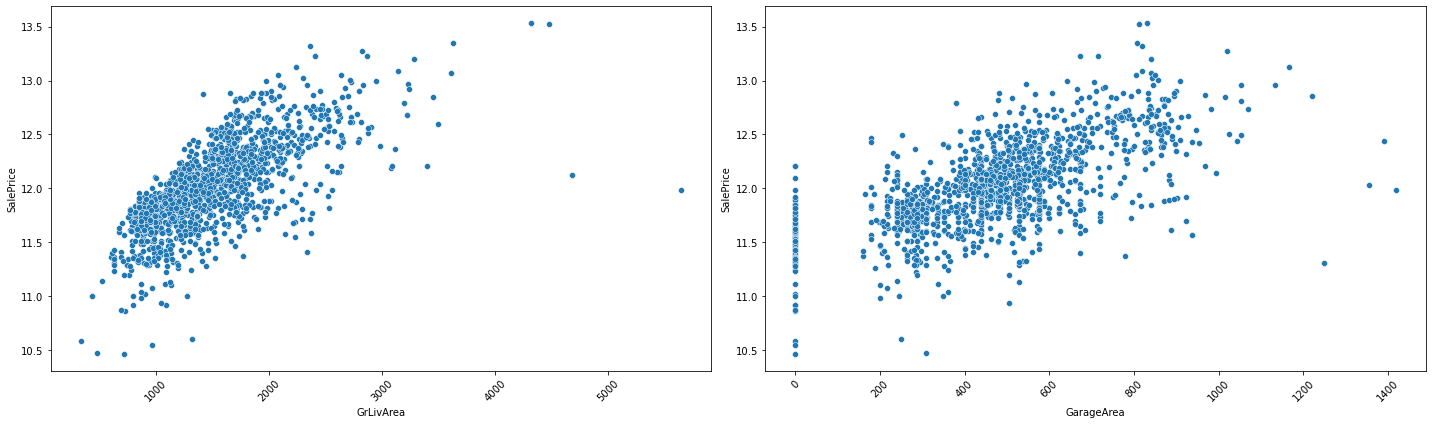

In [14]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
for i in range(len(suspect_columns_num)):
    plt.subplot(1,2,i+1)
    sns.scatterplot(x = suspect_columns_num[i], y = 'SalePrice', data = df)
    plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

Both these variables seem pretty correlated with the Sale price. In the GrLivArea we can see 2 dots that are outliers. So, we are going to remove them. In the case of the Garage area, a lot of points have a value of 0 since they are houses without a garage.

In [15]:
df = df[df.GrLivArea < 4500]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

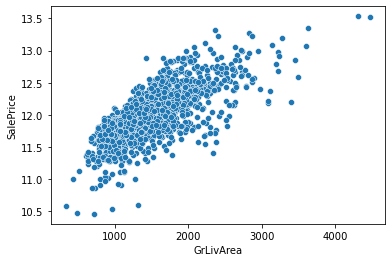

In [16]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)

<h3>Points observed</h3>

Of the 8 variables that we iintially thought that would influence sale price two of them don´t seem to correlate with it: The number of bedrooms and the utilities. These two variables will be removed from the ML model. The different variables from  Neighborhood and SaleType can be grouped to reduce the number varibles that go into the ML model. The other 4 seem to be correlated to the sale price.


<AxesSubplot:>

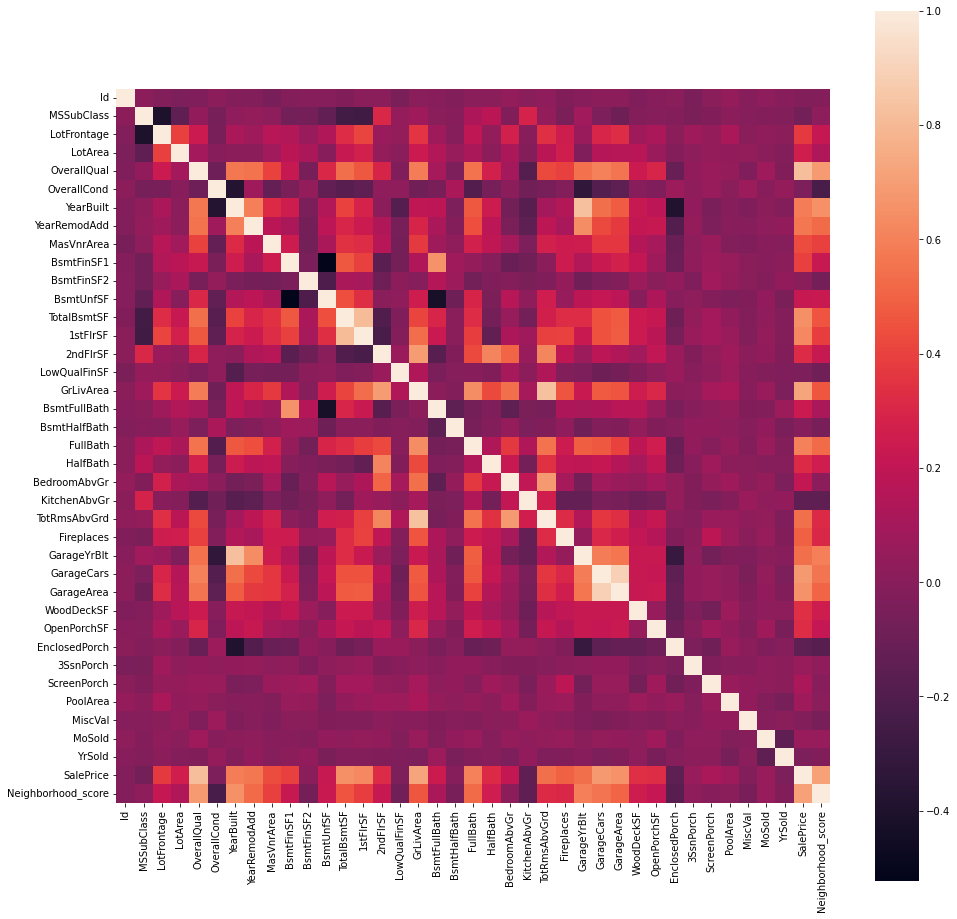

In [17]:
#Creates a heatmap that can visually show us the correlation of numbered variables with the sale price.
fig = plt.figure(figsize = (16,16))
#Makes dataframe with the columns as the index and as the columns. The values are the correlation between the index and
#the column.
correlation = df.corr()
#Creates a heatmap where we can visually assess the correlation.
sns.heatmap(correlation, square = True)

In [18]:
#Returns a series with the abolute value of the correlation (negative correlation is as important as a positive correlation
#in this case).
Sales_correlation = correlation.SalePrice.abs()

In [19]:
Sales_correlation = Sales_correlation.sort_values(ascending = False)
Sales_correlation

SalePrice             1.000000
OverallQual           0.821404
GrLivArea             0.725211
Neighborhood_score    0.712478
GarageCars            0.681033
GarageArea            0.656128
TotalBsmtSF           0.647563
1stFlrSF              0.620500
FullBath              0.595899
YearBuilt             0.587043
YearRemodAdd          0.565992
GarageYrBlt           0.541638
TotRmsAbvGrd          0.537702
Fireplaces            0.491998
MasVnrArea            0.434620
BsmtFinSF1            0.392283
LotFrontage           0.372899
WoodDeckSF            0.334250
OpenPorchSF           0.325215
2ndFlrSF              0.319953
HalfBath              0.314186
LotArea               0.260544
BsmtFullBath          0.237099
BsmtUnfSF             0.221892
BedroomAbvGr          0.209036
EnclosedPorch         0.149029
KitchenAbvGr          0.147534
ScreenPorch           0.121245
PoolArea              0.074338
MSSubClass            0.073969
MoSold                0.057064
3SsnPorch             0.054914
LowQualF

We can see from the heatmap that some values are heavily correlated with each other. For example, GarageCars and GarageArea, which make sense since the bigger the garage, the higher number of cars it can fit. Another one is YearBuilt and YearRemodAdd , since if the house wasn´t remodeled, the YearRemodAdd is equal to YearBuilt. So, for now, we are going to drop columns that are heavilly correlated, and stay with the one that has the most influence of Sale Price.

Some of these variables also do not affect the sales price that much. So we are going to remove varibles that have a lower correlation than 0.1 and with the others we are going to make some plots to see their relation with sale price.

In [20]:
Higher_correlation = Sales_correlation[Sales_correlation>correlation_factor]
Higher_correlation

SalePrice             1.000000
OverallQual           0.821404
GrLivArea             0.725211
Neighborhood_score    0.712478
GarageCars            0.681033
GarageArea            0.656128
TotalBsmtSF           0.647563
1stFlrSF              0.620500
FullBath              0.595899
YearBuilt             0.587043
YearRemodAdd          0.565992
GarageYrBlt           0.541638
TotRmsAbvGrd          0.537702
Fireplaces            0.491998
MasVnrArea            0.434620
BsmtFinSF1            0.392283
LotFrontage           0.372899
WoodDeckSF            0.334250
OpenPorchSF           0.325215
2ndFlrSF              0.319953
HalfBath              0.314186
LotArea               0.260544
BsmtFullBath          0.237099
BsmtUnfSF             0.221892
BedroomAbvGr          0.209036
EnclosedPorch         0.149029
KitchenAbvGr          0.147534
ScreenPorch           0.121245
Name: SalePrice, dtype: float64

In [21]:
columns_to_drop = ['TotalBsmtSF', 'GarageArea', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']
Higher_correlation = Higher_correlation.drop(columns_to_drop)
idx = Higher_correlation.index.values
df_correlated = df[idx]
df_correlated

,SalePrice,OverallQual,GrLivArea,Neighborhood_score,GarageCars,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,2ndFlrSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,ScreenPorch
0,12.247694,7,1710,1,2,856,2,2003,8,0,...,61,854,1,8450,1,150,3,0,1,0
1,12.109011,6,1262,1,2,1262,2,1976,6,1,...,0,0,0,9600,0,284,3,0,1,0
2,12.317167,7,1786,1,2,920,2,2001,6,1,...,42,866,1,11250,1,434,3,0,1,0
3,11.849398,7,1717,1,3,961,1,1915,7,1,...,35,756,0,9550,1,540,3,272,1,0
4,12.429216,8,2198,2,3,1145,2,2000,9,1,...,84,1053,1,14260,1,490,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6,1647,1,2,953,2,1999,7,1,...,40,694,1,7917,0,953,3,0,1,0
1456,12.254863,6,2073,1,2,2073,2,1978,7,2,...,0,0,0,13175,1,589,3,0,1,0
1457,12.493130,7,2340,1,1,1188,2,1941,9,2,...,60,1152,0,9042,0,877,4,0,1,0
1458,11.864462,5,1078,0,1,1078,1,1950,5,0,...,0,0,0,9717,1,0,2,112,1,0


We can see that the yearbuilt only starts to influnce the price after some years, which means we can group these years before we see an increase into the same year to create a linear relationship with the sale price.

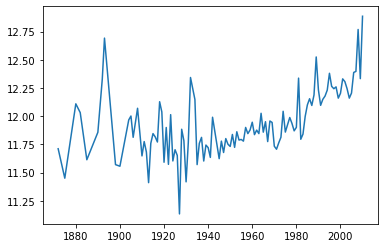

In [22]:
plt.plot(df.groupby('YearBuilt').SalePrice.median().index, df.groupby('YearBuilt').SalePrice.median().values)
plt.show()

In [23]:
df.groupby('YearBuilt').SalePrice.median()[30:].head(15)

YearBuilt
1926    11.652687
1927    11.134589
1928    11.884489
1929    11.782923
1930    11.418615
1931    11.765196
1932    12.342801
1934    12.147914
1935    11.571306
1936    11.759786
1937    11.812289
1938    11.603043
1939    11.744376
1940    11.721721
1941    11.635143
Name: SalePrice, dtype: float64

It seems that from 1935 the prices begin to increase. So every year before that will become 1935.

In [24]:
df_correlated['YearBuilt'] = df_correlated['YearBuilt'].apply(lambda x: x if x>1935 else 1935)
df_correlated

,SalePrice,OverallQual,GrLivArea,Neighborhood_score,GarageCars,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,2ndFlrSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,ScreenPorch
0,12.247694,7,1710,1,2,856,2,2003,8,0,...,61,854,1,8450,1,150,3,0,1,0
1,12.109011,6,1262,1,2,1262,2,1976,6,1,...,0,0,0,9600,0,284,3,0,1,0
2,12.317167,7,1786,1,2,920,2,2001,6,1,...,42,866,1,11250,1,434,3,0,1,0
3,11.849398,7,1717,1,3,961,1,1935,7,1,...,35,756,0,9550,1,540,3,272,1,0
4,12.429216,8,2198,2,3,1145,2,2000,9,1,...,84,1053,1,14260,1,490,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6,1647,1,2,953,2,1999,7,1,...,40,694,1,7917,0,953,3,0,1,0
1456,12.254863,6,2073,1,2,2073,2,1978,7,2,...,0,0,0,13175,1,589,3,0,1,0
1457,12.493130,7,2340,1,1,1188,2,1941,9,2,...,60,1152,0,9042,0,877,4,0,1,0
1458,11.864462,5,1078,0,1,1078,1,1950,5,0,...,0,0,0,9717,1,0,2,112,1,0


Usually, normally distributed data works better for regression than skewd data. Data is fairly simmetrical when the skewness is between -0.5 and 0.5. When data has a positive skewness (>0.5), an easy way to solve the skewness is to apply log(x). And so next,we are going to determine the skewness of each of our numerical columns and, if the column is positivelly skewed, we are going o apply the log1p(x) funciton (this function will add +1 to the number to avoid a value of 0, since there is no log(0).

In [25]:
from scipy.stats import skew
#We have to first select only the numerical columns
numerical_columns = df_correlated.dtypes[df_correlated.dtypes != "object"].index
#Selects the columns that have a positive skewness
right_skew_columns = df_correlated.skew()[df_correlated.skew()>0.5].index
#Applies the log1p function to those columns
df_correlated[right_skew_columns] = np.log1p((df_correlated[right_skew_columns]))
#Same thing but with negative skew
left_skew_columns = df_correlated.skew()[df_correlated.skew()<-0.5].index
df_correlated[left_skew_columns] = (df_correlated[left_skew_columns])**2

In [26]:
df_correlated.skew()

SalePrice             0.121568
OverallQual           0.200786
GrLivArea            -0.071012
Neighborhood_score    0.263884
GarageCars           -0.342377
1stFlrSF              0.006984
FullBath              0.031271
YearBuilt            -0.146523
TotRmsAbvGrd         -0.070180
Fireplaces            0.178863
BsmtFinSF1           -0.388072
WoodDeckSF            0.156514
OpenPorchSF          -0.022890
2ndFlrSF              0.292784
HalfBath              0.570076
LotArea              -0.181278
BsmtFullBath          0.419409
BsmtUnfSF            -1.103319
BedroomAbvGr          0.212325
EnclosedPorch         2.109967
KitchenAbvGr          3.866269
ScreenPorch           3.147639
dtype: float64

<h3> And with this, we finished anayzing the numerical variables and can now go to the categorical ones! </h3>

In [27]:
df3 = df.select_dtypes(object)
df3['SalePrice'] = df['SalePrice']
print('Number of columns is {}.'.format(len(df3.columns)))
print(f"NUmber of columns is {len(df3.columns)}")

Number of columns is 44.
NUmber of columns is 44


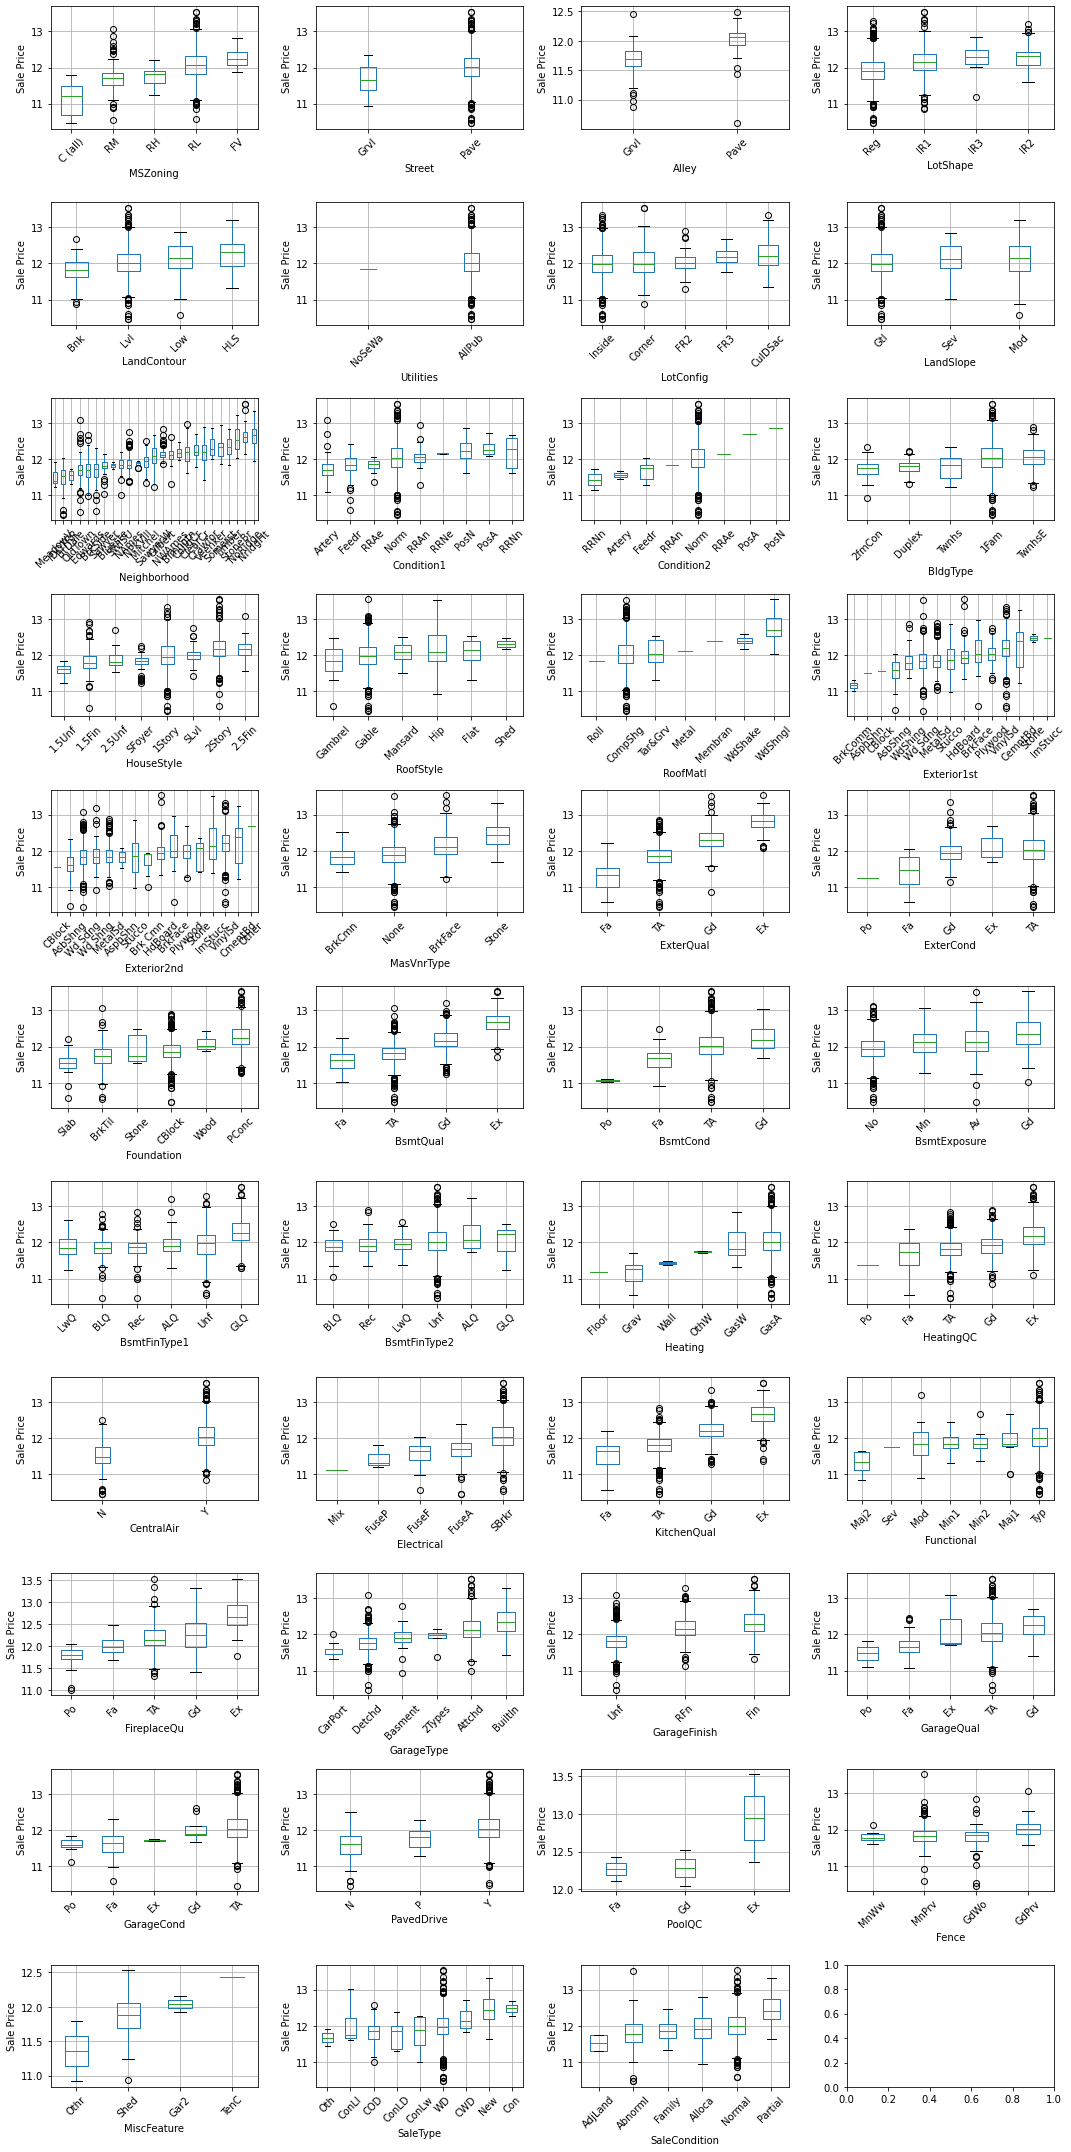

In [28]:
#Here we are making a ordered boxplot to visually see the relations between the categorical variables and the SalePrice.
#We are also creating a new dataframe where the categorical varibles are being replaced with numbers. This will allow
#us to calculate the correlation between these variables and the SalePrice and remove those that are not correlated.
fig, ax = plt.subplots(11,4, figsize = (15, 30))
df_categorical = df3.copy()
for i in range(len(df3.columns)-1):
    plt.subplot(11,4, i+1)
    ax, order = get_ordered_boxplot(df3.columns[i], (6,6), df3, figure = False)
    df_categorical[df_categorical.columns[i]] = pd.Categorical(df_categorical[df_categorical.columns[i]], categories = order, ordered = True)
    df_categorical[df_categorical.columns[i]] = df_categorical[df_categorical.columns[i]].cat.codes
plt.tight_layout()
plt.show()
    

In [29]:
df3.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.247694
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.109011
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.317167
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,11.849398
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,12.429216


In [30]:
categorical_correlation = df_categorical.corr()
new_cat_corr = categorical_correlation.SalePrice.abs().sort_values(ascending = False)
new_cat_corr

SalePrice        1.000000
Neighborhood     0.740221
ExterQual        0.682225
KitchenQual      0.669989
BsmtQual         0.649133
GarageFinish     0.605602
GarageType       0.576376
FireplaceQu      0.546791
Foundation       0.534110
HeatingQC        0.473938
Exterior1st      0.411841
MSZoning         0.410584
MasVnrType       0.404794
BsmtFinType1     0.397606
Exterior2nd      0.392611
GarageCond       0.377614
GarageQual       0.371822
BsmtExposure     0.358410
CentralAir       0.351598
HouseStyle       0.306546
PavedDrive       0.304683
SaleType         0.289922
Electrical       0.286061
LotShape         0.282279
BsmtCond         0.274540
SaleCondition    0.270212
RoofStyle        0.203617
Condition1       0.195110
BsmtFinType2     0.185213
Heating          0.178551
BldgType         0.176740
ExterCond        0.158790
LandContour      0.154965
LotConfig        0.145223
Functional       0.141374
Fence            0.139429
RoofMatl         0.129363
Condition2       0.110288
Alley       

In [31]:
#Removing the columns that have a correlation factor with SalePrice lower than "correlation_factor"
columns_to_drop = new_cat_corr[new_cat_corr<correlation_factor].index
df3 = df3.drop(columns_to_drop, axis = 1)
#df3 = df3.drop('Neighborhood', axis = 1)

With these boxplots we can devide the categories into 3 groups:
    
**No Correlation**: Street, LandContour, Utilities, LotConfig, LandSlope,  BldgType, HouseStyle, RoofStyle, Exterior2nd, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageFinish, GarageCond, PavedDrive, Fence.

**Some Correlation**: Alley, Condition1, Condition2, LotShape, RoofMatl, Exterior1st, MasVnrType, Foundation, HeatingQC, CentralAir, Functional (remove Maj2 and they are all the same), GarageQual, PoolQC (Ex or not), SaleType, SaleCondition

**A lot of correlation**: MSZoning, Neighborhood, ExterQual, ExterCond, BsmtQual, BsmtCond, Heating, Electrical, KitchenQual, FireplaceQu, GarageType,  MiscFeature.

In [32]:
null_categorical_values = df3.isna().sum().sort_values(ascending = False).head(20)

With this information we can see that most houses dont have information of PoolQC, MiscFeature, Alley and FireplaceQu. Since these values represent a high percentage of houses, we are just going to remove them. The other ones, we are goin to fill the information with the mode.

In [33]:
df3 = df3.drop(null_categorical_values[null_categorical_values>500].index, axis = 1)

In [34]:
df3.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.247694
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.109011
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.317167
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.849398
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,12.429216


In [35]:
#Fills every categorical column that has a missing value with the most common value of the column.
columns_is_nan = df3.isna().sum().sort_values(ascending = False)
columns_for_fill = columns_is_nan[columns_is_nan>0]
for i in columns_for_fill.index:
    df3[i] = df3[i].fillna(df3[i].mode()[0])

In [36]:
#Creates a dataframe where the values of the categorical columns of df3 are converted into columns, where the rowx value is 1 if 
#the df3 rowx had a value equal to the column of the dummy df and 0 otherwise.
dummies = pd.get_dummies(df3)

In [37]:
#Concatenates a list of df's, putting the df's "side by side" (axis = 1).
df_final = pd.concat([df_correlated, dummies], axis = 1)

In [38]:
df_final.describe()

,SalePrice,OverallQual,GrLivArea,Neighborhood_score,GarageCars,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,12.024009,6.093964,7.266762,0.389194,1.766118,7.006746,1.563786,1973.748971,1.993679,0.398997,...,0.003429,0.082305,0.002058,0.868999,0.069273,0.002743,0.008230,0.013717,0.821674,0.084362
std,0.399715,1.376369,0.330142,0.402613,0.747104,0.314193,0.549891,25.615714,0.213483,0.394008,...,0.058480,0.274922,0.045330,0.337518,0.254005,0.052324,0.090379,0.116355,0.382919,0.278026
min,10.460242,1.000000,5.814131,0.000000,0.000000,5.814131,0.000000,1935.000000,1.098612,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.774713,5.000000,7.029530,0.000000,1.000000,6.783325,1.000000,1954.000000,1.791759,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,12.001505,6.000000,7.287901,0.693147,2.000000,6.991177,2.000000,1972.500000,1.945910,0.693147,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,12.273731,7.000000,7.482682,0.693147,2.000000,7.238317,2.000000,2000.000000,2.079442,0.693147,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,13.534473,10.000000,8.406708,1.098612,4.000000,8.079928,3.000000,2010.000000,2.708050,1.386294,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#Cases that happen once or twice are gonna make so that the data gets overfitted. This can be fixed by removing those
#columns. So, I'm going to remove the columns of categorical values where they have a value of 1 less than 2% of the time.
counter_series = df_final[df_final>0].count()
counter_series = counter_series[counter_series<int(len(df_final)*0.02)]
remove_index = counter_series.index
df_final = df_final.drop(remove_index, axis = 1)
final_columns = df_final.columns

In [40]:
y = df_final.pop('SalePrice')

In [41]:
X = df_final

In [42]:
df_final.shape

(1458, 149)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [45]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.8793542639626339

In [46]:
regressor.fit(X, y)

LinearRegression()

In [47]:
test = pd.read_csv('test.csv')
idx = test.pop('Id')
test['Neighborhood_score'] = test['Neighborhood'].apply(neighborhood, args = (low, median, high))
test['YearBuilt'] = test['YearBuilt'].apply(lambda x: x if x>1935 else 1935)
df5 = test.select_dtypes(object)
df5 = pd.get_dummies(df5)
test = test.select_dtypes(['float64', 'int64'])
#Already know from a previous error that the test houses don't have these values, so I'm going to add them so the
#regressor doesn't return an error saying there are column missing.
test[right_skew_columns] = np.log1p(test[right_skew_columns])
test[left_skew_columns] = test[left_skew_columns]**2
test = pd.concat([test, df5], axis = 1)
columns_2 = X.columns
test = test[columns_2]
test.head()

,OverallQual,GrLivArea,Neighborhood_score,GarageCars,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,Fireplaces,BsmtFinSF1,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,5,6.799056,0.000000,1.0,6.799056,1,1961,1.791759,0.000000,37.829914,...,1,0,0,1,0,0,1,0,1,0
1,6,7.192934,0.000000,1.0,7.192934,1,1958,1.945910,0.000000,46.631309,...,1,0,0,1,0,0,1,0,1,0
2,5,7.396335,0.693147,2.0,6.834109,2,1997,1.945910,0.693147,44.549770,...,1,0,0,1,0,0,1,0,1,0
3,6,7.380879,0.693147,2.0,6.831954,2,1998,2.079442,0.693147,40.984544,...,1,0,0,1,0,0,1,0,1,0
4,8,7.155396,1.098612,2.0,7.155396,2,1992,1.791759,0.000000,31.091208,...,1,0,0,1,0,0,1,0,1,0


In [48]:
test = test.fillna(test.median())

In [49]:
test.isna().sum().sort_values()

OverallQual              0
BsmtQual_Gd              0
BsmtQual_TA              0
BsmtCond_Fa              0
BsmtCond_Gd              0
                        ..
Neighborhood_Timber      0
Condition1_Artery        0
Condition1_Feedr         0
Condition2_Norm          0
SaleCondition_Partial    0
Length: 149, dtype: int64

In [50]:
prediction_test = regressor.predict(test)
prediction_test.shape

(1459, 2)

In [51]:
final_array = np.exp(prediction_test)

In [52]:
final_array = final_array[:,1]

In [53]:
final_array.shape

(1459,)

In [54]:
df_fi = pd.DataFrame(final_array, columns = ['SalePrice'])
df_final = pd.DataFrame(idx)

In [55]:
df_final['SalePrice'] = final_array

In [56]:
df_final

,Id,SalePrice
0,1461,109725.351811
1,1462,172611.407210
2,1463,180882.008215
3,1464,192318.489964
4,1465,210019.781952
...,...,...
1454,2915,87616.617678
1455,2916,80329.623949
1456,2917,156048.755400
1457,2918,123652.007369


In [57]:
df_final.to_csv('final.csv', index = False)

This aproach led me to a score of 0.13165 in 12/06/2022 which led to a ranking of 1147 of 4244.